In [1]:
#Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import CategoricalNB,GaussianNB,MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks

In [2]:
from google.colab import files
Uploaded=files.upload()

Saving SalaryData_Train.csv to SalaryData_Train.csv


In [3]:
SalaryData=pd.read_csv("SalaryData_Train.csv")
SalaryData

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


EDA

In [4]:
SalaryData.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [6]:
SalaryData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [7]:
#Deleting Duplicates
SalaryData[SalaryData.duplicated()]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
326,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
364,27,Private,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,50,United-States,<=50K
518,24,Private,HS-grad,9,Never-married,Handlers-cleaners,Unmarried,Black,Female,0,0,40,United-States,<=50K
525,24,Private,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
619,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30110,47,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
30118,20,Private,HS-grad,9,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,40,United-States,<=50K
30132,22,Private,Some-college,10,Never-married,Adm-clerical,Own-child,White,Male,0,0,40,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K


In [8]:
SalaryData.drop_duplicates(inplace=True)

In [9]:
SalaryData.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,26903.000000,26903.000000,26903.000000,26903.000000,26903.000000
mean,39.049140,10.144296,1215.443259,98.427499,41.164591
std,13.188825,2.620154,7805.366384,425.493211,12.347051
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,29.000000,9.000000,0.000000,0.000000,40.000000
50%,38.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [10]:
SalaryData.corr()

<ipython-input-10-c58ecc48fb7c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  SalaryData.corr()


,age,educationno,capitalgain,capitalloss,hoursperweek
age,1.000000,0.038048,0.077235,0.052684,0.072529
educationno,0.038048,1.000000,0.126085,0.080025,0.145491
capitalgain,0.077235,0.126085,1.000000,-0.036023,0.079403
capitalloss,0.052684,0.080025,-0.036023,1.000000,0.049093
hoursperweek,0.072529,0.145491,0.079403,0.049093,1.000000


<ipython-input-11-bf243d3c3e5f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corematrix=SalaryData.corr()


<Axes: >

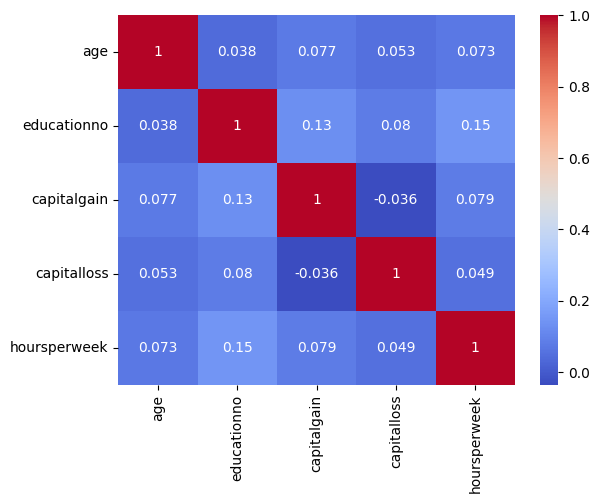

In [11]:
corematrix=SalaryData.corr()
sns.heatmap(corematrix,cmap='coolwarm', annot=True)

<ipython-input-12-67e8d171438f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((SalaryData['age']))


<Axes: xlabel='age', ylabel='Density'>

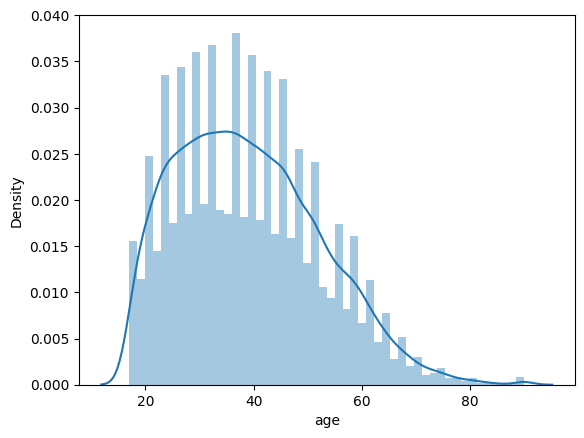

In [12]:
sns.distplot((SalaryData['age']))

<Axes: >

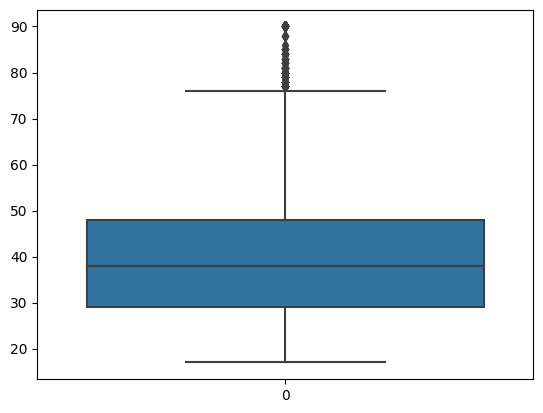

In [13]:
sns.boxplot((SalaryData['age']))

<ipython-input-15-b11d86209c6e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((SalaryData['educationno']))


<Axes: xlabel='educationno', ylabel='Density'>

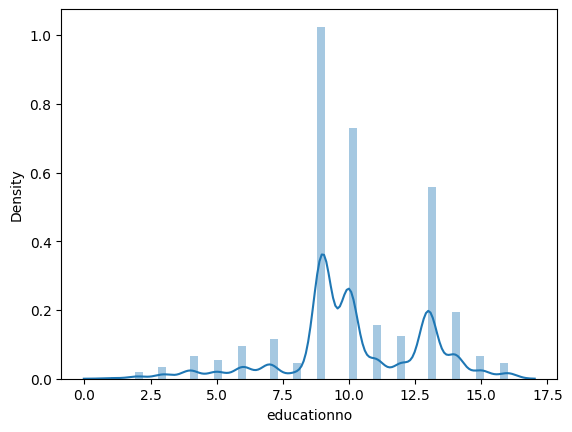

In [15]:
sns.distplot((SalaryData['educationno']))

<Axes: >

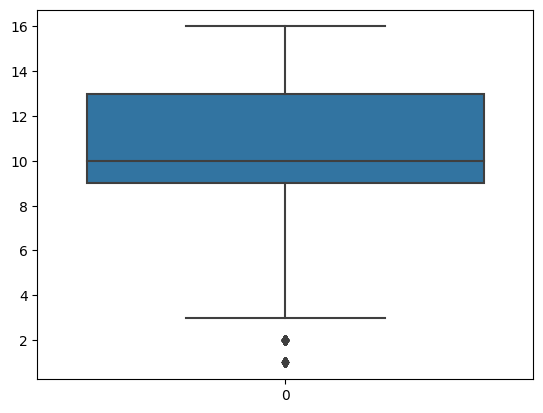

In [16]:
sns.boxplot((SalaryData['educationno']))

<ipython-input-17-8c2a48d57bff>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((SalaryData['capitalgain']))


<Axes: xlabel='capitalgain', ylabel='Density'>

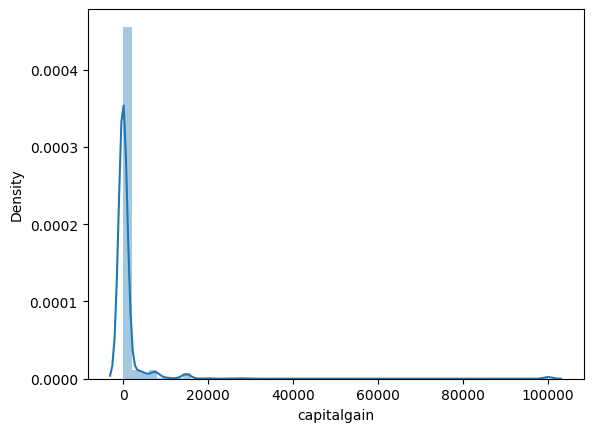

In [17]:
sns.distplot((SalaryData['capitalgain']))

<Axes: >

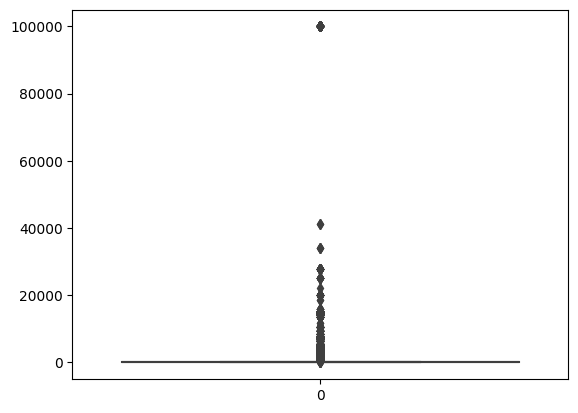

In [18]:
sns.boxplot(SalaryData['capitalgain'])

<ipython-input-19-7eea2a040034>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(SalaryData['capitalloss'])


<Axes: xlabel='capitalloss', ylabel='Density'>

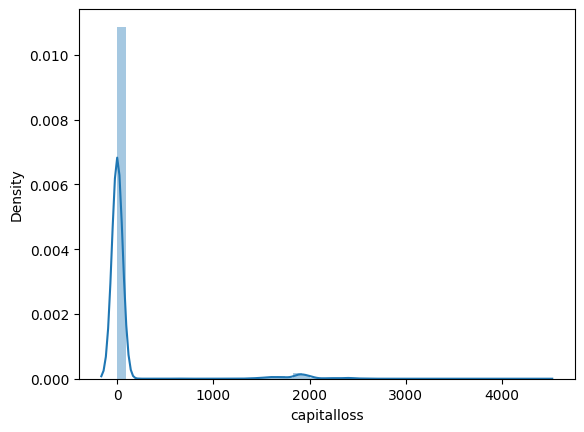

In [19]:
sns.distplot(SalaryData['capitalloss'])

<Axes: >

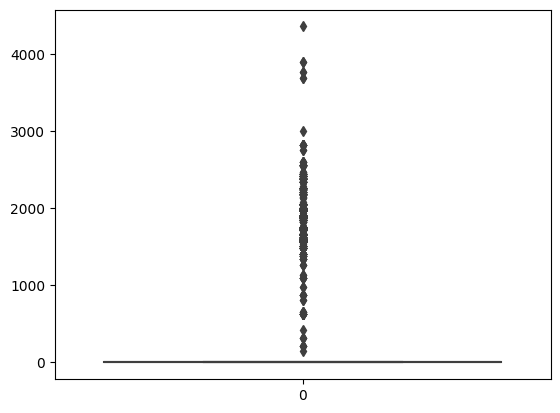

In [20]:
sns.boxplot(SalaryData['capitalloss'])

<ipython-input-21-9cb4a70e597a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((SalaryData['hoursperweek']))


<Axes: xlabel='hoursperweek', ylabel='Density'>

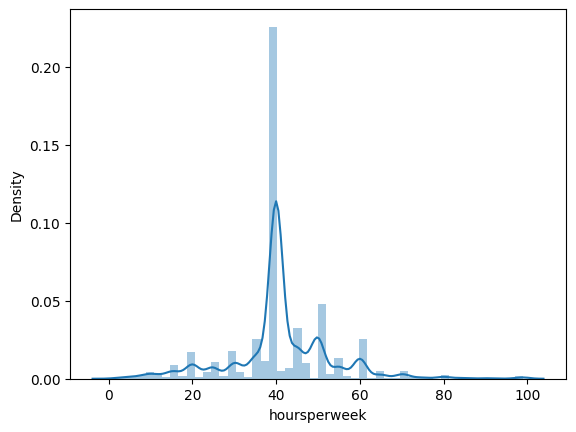

In [21]:
sns.distplot((SalaryData['hoursperweek']))

<Axes: >

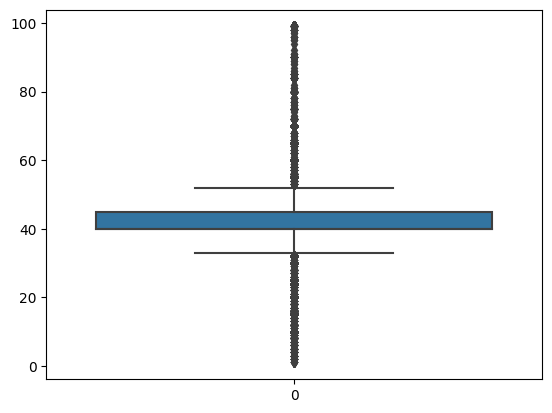

In [22]:
sns.boxplot((SalaryData['hoursperweek']))

In [23]:
SalaryData['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' Self-emp-inc', ' Without-pay'], dtype=object)

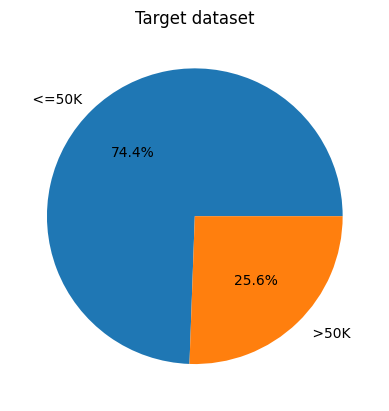

In [24]:
plt.pie(SalaryData["Salary"].value_counts(),autopct='%1.1f%%',labels=SalaryData["Salary"].unique())
plt.title("Target dataset")
plt.show()

Data Set is unbalanced.

Label Encoding

In [25]:
label=LabelEncoder()
SalaryData["workclass"]=label.fit_transform(SalaryData["workclass"])
SalaryData["education"]=label.fit_transform(SalaryData["education"])
SalaryData["educationno"]=label.fit_transform(SalaryData["educationno"])
SalaryData["maritalstatus"]=label.fit_transform(SalaryData["maritalstatus"])
SalaryData["occupation"]=label.fit_transform(SalaryData["occupation"])
SalaryData["relationship"]=label.fit_transform(SalaryData["relationship"])
SalaryData["race"]=label.fit_transform(SalaryData["race"])
SalaryData["sex"]=label.fit_transform(SalaryData["sex"])
SalaryData["native"]=label.fit_transform(SalaryData["native"])
SalaryData["Salary"]=label.fit_transform(SalaryData["Salary"])

<=50--------->0

=50---------->1

In [26]:
SalaryData

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,12,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,12,2,3,0,4,1,0,0,13,37,0
2,38,2,11,8,0,5,1,4,1,0,0,40,37,0
3,53,2,1,6,2,5,0,2,1,0,0,40,37,0
4,28,2,9,12,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30154,53,2,12,13,2,3,0,4,1,0,0,40,37,1
30155,22,2,15,9,4,10,1,4,1,0,0,40,37,0
30156,27,2,7,11,2,12,5,4,0,0,0,38,37,0
30158,58,2,11,8,6,0,4,4,0,0,0,40,37,0


Data of target column is unbalanced

In [27]:
SalaryData["Salary"].unique()

array([0, 1])

In [28]:
SalaryData["Salary"].value_counts()

0    20023
1     6880
Name: Salary, dtype: int64

Feature transformation for age column log transformation

In [29]:
SalaryData['educationno']=np.square(SalaryData['educationno'])

In [30]:
SalaryData["age"]=np.log(SalaryData["age"])

In [31]:
X=SalaryData.iloc[:,0:13]
Y=SalaryData["Salary"]

Model building

Let us use Gaussian Naive Bayes since it contains both categorical and numerical featues for that let us scale all the datas

In [32]:
#Train Test Split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=40)

MODEL CREATION

Multinomial Naive Bayes

In [33]:
MNB=MultinomialNB()
MNBmodel=MNB.fit(X_train,Y_train)

In [34]:
print(accuracy_score(Y_train,MNBmodel.predict(X_train)))

0.7641483133537775


In [35]:
print(classification_report(Y_train,MNBmodel.predict(X_train)))

              precision    recall  f1-score   support

           0       0.78      0.95      0.86     15946
           1       0.62      0.23      0.33      5576

    accuracy                           0.76     21522
   macro avg       0.70      0.59      0.59     21522
weighted avg       0.74      0.76      0.72     21522



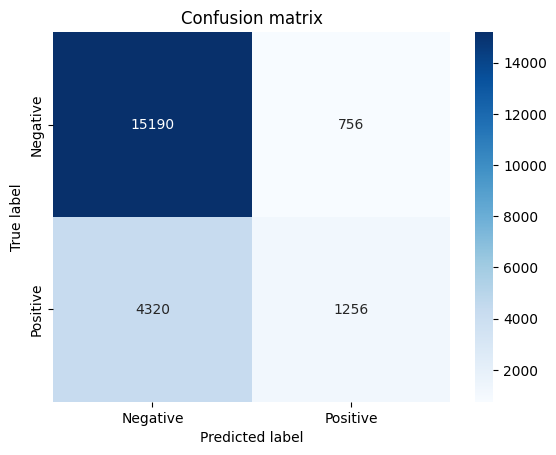

In [36]:
labels=["Negative","Positive"]
cm=confusion_matrix(Y_train,MNBmodel.predict(X_train))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix')
plt.show()

In [37]:
print(accuracy_score(Y_test,MNBmodel.predict(X_test)))

0.7851700427429846


In [38]:
print(classification_report(Y_test,MNBmodel.predict(X_test)))

              precision    recall  f1-score   support

           0       0.80      0.96      0.87      4077
           1       0.65      0.25      0.36      1304

    accuracy                           0.79      5381
   macro avg       0.72      0.60      0.62      5381
weighted avg       0.76      0.79      0.75      5381



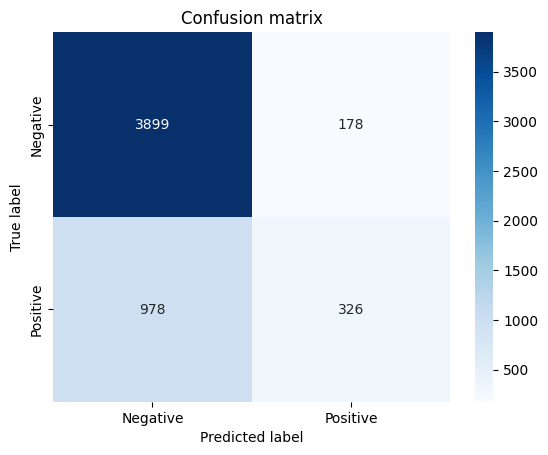

In [39]:
labels=["Negative","Positive"]
cm=confusion_matrix(Y_test,MNBmodel.predict(X_test))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix')
plt.show()

MultinomialNB not performing very well.So letus go for Gaussian NB

Gaussian Naive Bayes

In [40]:
#Standard Scaling
scale=StandardScaler()

In [41]:
X=scale.fit_transform(X)

In [42]:
#Train Test Split for Model Validation
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=40)

<ipython-input-43-a2e17e9d84ce>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X[:,1])


<Axes: ylabel='Density'>

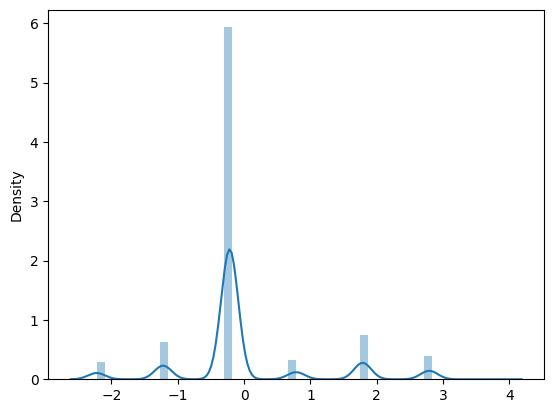

In [43]:
sns.distplot(X[:,1])

Here categorical as well as Numerical values are mixed so we can go for Gaussian Naive Bayes

In [45]:
GNB=GaussianNB()
model=GNB.fit(X_train,Y_train)

In [46]:
print(accuracy_score(Y_train,model.predict(X_train)))

0.8035033918780783


In [47]:
print(classification_report(Y_train,model.predict(X_train)))

              precision    recall  f1-score   support

           0       0.82      0.94      0.88     15946
           1       0.71      0.41      0.52      5576

    accuracy                           0.80     21522
   macro avg       0.76      0.68      0.70     21522
weighted avg       0.79      0.80      0.78     21522



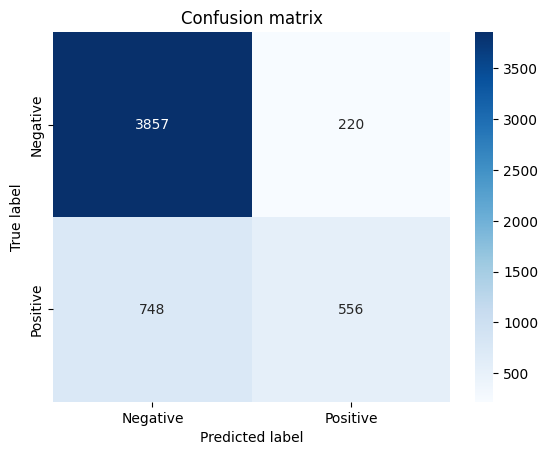

In [48]:
labels=["Negative","Positive"]
cm=confusion_matrix(Y_test,model.predict(X_test))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix')
plt.show()

In [49]:
print(accuracy_score(Y_test,model.predict(X_test)))

0.8201077866567552


In [50]:
print(classification_report(Y_test,model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4077
           1       0.72      0.43      0.53      1304

    accuracy                           0.82      5381
   macro avg       0.78      0.69      0.71      5381
weighted avg       0.81      0.82      0.80      5381



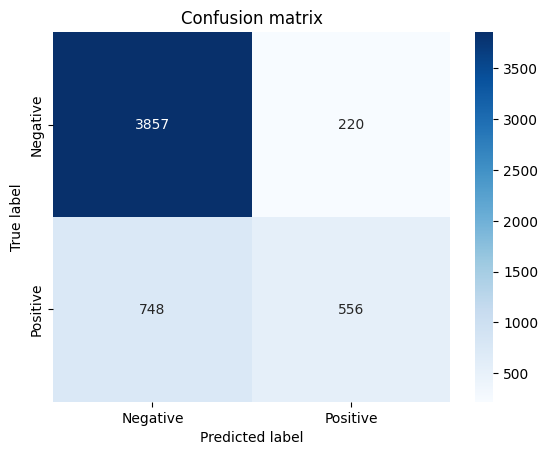

In [51]:
labels=["Negative","Positive"]
cm=confusion_matrix(Y_test,model.predict(X_test))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix')
plt.show()

GaussianNB shows much more better performance compared to MulltinomialNB.Both train section and test section shows near accuracy.Class 1 accuracy is very less due to the data set is unbalanced. So, let us try it with Combined sampling.

Mulninomial NB shows less accuracy than GaussianNB.

Combined Sampling

In [52]:
SMOTE = SMOTETomek(random_state=42)
TM = TomekLinks()
X_train_res, y_train_res = TM.fit_resample(X_train,Y_train)
X_train_res, y_train_res = SMOTE.fit_resample(X_train_res, y_train_res)

In [53]:
# train decision tree on resampled training set
GNB=GaussianNB()
COMBINEDMODEL=GNB.fit(X_train_res,y_train_res)

# evaluate decision tree on testing set
y_pred = COMBINEDMODEL.predict(X_test)
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89      4077
           1       0.67      0.54      0.60      1304

    accuracy                           0.83      5381
   macro avg       0.77      0.73      0.74      5381
weighted avg       0.82      0.83      0.82      5381



In [54]:
print(accuracy_score(Y_test,COMBINEDMODEL.predict(X_test)))

0.8251254413677755


Class 1 accuracy improved by combined sampling

Performing the model with Test Data

In [55]:
from google.colab import files
Uploaded=files.upload()

Saving SalaryData_Test.csv to SalaryData_Test.csv


In [56]:
TestData=pd.read_csv("SalaryData_Test.csv")
TestData

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [57]:
TestData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [58]:
TestData.drop_duplicates(inplace=True)

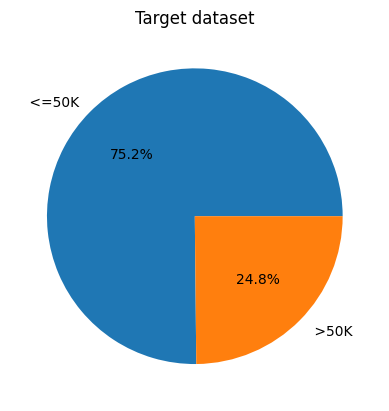

In [59]:
plt.pie(TestData["Salary"].value_counts(),autopct='%1.1f%%',labels=TestData["Salary"].unique())
plt.title("Target dataset")
plt.show()

In [60]:
label=LabelEncoder()
TestData["workclass"]=label.fit_transform(TestData["workclass"])
TestData["education"]=label.fit_transform(TestData["education"])
TestData["educationno"]=label.fit_transform(TestData["educationno"])
TestData["maritalstatus"]=label.fit_transform(TestData["maritalstatus"])
TestData["occupation"]=label.fit_transform(TestData["occupation"])
TestData["relationship"]=label.fit_transform(TestData["relationship"])
TestData["race"]=label.fit_transform(TestData["race"])
TestData["sex"]=label.fit_transform(TestData["sex"])
TestData["native"]=label.fit_transform(TestData["native"])
TestData["Salary"]=label.fit_transform(TestData["Salary"])

In [61]:
X_test=TestData.iloc[:,0:13]
Y_test=TestData["Salary"]

In [62]:
GNB=GaussianNB()
model=GNB.fit(X,Y)

In [63]:
print(accuracy_score(Y_test,model.predict(X_test)))

0.7736022646850672


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


In [65]:
print(classification_report(Y_test,model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.80      0.92      0.86     10620
           1       0.58      0.32      0.42      3510

    accuracy                           0.77     14130
   macro avg       0.69      0.62      0.64     14130
weighted avg       0.75      0.77      0.75     14130



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


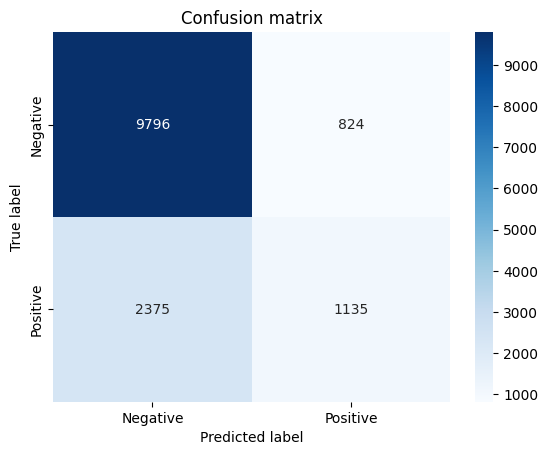

In [66]:
labels=["Negative","Positive"]
cm=confusion_matrix(Y_test,model.predict(X_test))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix')
plt.show()

Hence, Accuracy score is good for Both training and test datasets.